# Shinkansen Travel Experience

## Introduction
The purposde of this report is to:
* Identify the different factors that drive passenger satisaction.
* Make a model to predict whether a passenger was satisfied or not considering the overall experience of traveling on the Shinkansen Bullet Train.

**Dataset**

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. 

**Travel Data Dictionary:**

* **ID** - The unique ID of the passenger.
* **Gender** - The gender of the passenger.
* **Customer_Type** - Loyalty type of the passenger.
* **Age** - The age of the passenger.
* **Type_Travel** - Purpose of travel for the passenger.
* **Travel_Class** - The train class that the passenger traveled in.
* **Travel_Distance** - The distance traveled by the passenger.
* **Departure_Delay_in_Mins** - The delay (in minutes) in train departure.
* **Arrival_Delay_in_Mins** - The delay (in minutes) in train arrival.

**Survey Data Dictionay:**

* **ID** - The unique ID of the passenger.
* **Platform_Location** - How convenient the location of the platform is for the passenger.
* **Seat_Class** - The type of the seat class in the train, Green Car seats are usually more spacious and comfortable than ordinary seats. On the Shinkansen train, there are only four seats per row in the Green Car, versus five in the ordinary car.
* **Overall_Experience** - The overall experience of the passenger. Target variable.
* **Seat_Comfort** - The comfort level of the seat for the passenger.
* **Arrival_Time_Convenient** - How convenient the arrival time of the train is for the passenger.
* **Catering** - How convenient the catering service is for the passenger.
* **Onboard_Wifi_Service** - The quality of the onboard Wi-Fi service for the passenger.
* **Onboard_Entertainment** - The quality of the onboard entertainment for the passenger.
* **Online_Support** - The quality of the online support for the passenger.
* **Ease_of_Online_Booking** - The ease of online booking for the passenger.
* **Onboard_Service** - The quality of the onboard service for the passenger.
* **Legroom** - Legroom is the general term used in place of the more accurate “seat pitch”, which is the distance between a point on one seat and the same point on the seat in front of it. This variable describes the convenience of the legroom provided for the passenger.
* **Baggage_Handling** - The convenience of baggage handling for the passenger.
* **CheckIn_Service** - The convenience of the check-in service for the passenger.
* **Cleanliness** - The passenger's view of the cleanliness of the service.
* **Online_Boarding** - The convenience of the online boarding process for the passenger.

## Data Validation 

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [175]:
travel_train = pd.read_csv('../data/Traveldata_train.csv')

In [176]:
travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [177]:
survey_train = pd.read_csv('../data/Surveydata_train.csv')

In [178]:
survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

We can use ID as the column to join the trains datasets.

In [179]:
data_train = pd.merge(travel_train, survey_train, on = 'ID', how = 'inner')

In [180]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [181]:
data_train.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

**Observations**:
* There are 94397 observations on the train dataset.
* There are missing values in several columns of the dataset.

Let's check the unique values in each column and if we have any duplicates

In [182]:
data_train.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

In [183]:
data_train.duplicated().any()

False

**Observations**:
* ID is a unique identifier for each passenger, we can drop this column as it would not add any value to our analysis.
* We don't have any duplicated rows on our dataset.

Let's drop the ID column and define list for numerical and categorical columns to explore and work separately.

In [184]:
data_train = data_train.drop('ID', axis=1)

In [185]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Arrival_Delay_in_Mins    94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_Location        94349 non-null  object 
 14  Onboard_Wifi_Service  

In [186]:
object_att = data_train.select_dtypes(include = 'object').columns.values.tolist()
object_att

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [187]:
num_att = data_train.select_dtypes(exclude = 'object').columns.values.tolist()
num_att

['Age',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Overall_Experience']

Let's check for strange values in numerical and categorical columns.

In [188]:
data_train[num_att].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


In [189]:
for i in range(len(object_att)):
    print(object_att[i])
    print(data_train[object_att[i]].unique())

Gender
['Female' 'Male' nan]
Customer_Type
['Loyal Customer' 'Disloyal Customer' nan]
Type_Travel
[nan 'Personal Travel' 'Business Travel']
Travel_Class
['Business' 'Eco']
Seat_Comfort
['Needs Improvement' 'Poor' 'Acceptable' 'Good' 'Excellent'
 'Extremely Poor' nan]
Seat_Class
['Green Car' 'Ordinary']
Arrival_Time_Convenient
['Excellent' 'Needs Improvement' 'Acceptable' nan 'Good' 'Poor'
 'Extremely Poor']
Catering
['Excellent' 'Poor' 'Needs Improvement' nan 'Acceptable' 'Good'
 'Extremely Poor']
Platform_Location
['Very Convenient' 'Needs Improvement' 'Manageable' 'Inconvenient'
 'Convenient' nan 'Very Inconvenient']
Onboard_Wifi_Service
['Good' 'Needs Improvement' 'Acceptable' 'Excellent' 'Poor'
 'Extremely Poor' nan]
Onboard_Entertainment
['Needs Improvement' 'Poor' 'Good' 'Excellent' 'Acceptable'
 'Extremely Poor' nan]
Online_Support
['Acceptable' 'Good' 'Excellent' 'Poor' nan 'Needs Improvement'
 'Extremely Poor']
Ease_of_Online_Booking
['Needs Improvement' 'Good' 'Excellent' 'Ac

**Observations**:
* There are clear outliers in both Departure_Delay_in_Mins and Arrival_Delay_in_Mins columns, for the other columns the range contraints are met. 
* There are no extrange values in any categorical column

## EDA

### Target Variable

In [190]:
data_train['Overall_Experience'].value_counts(normalize=True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

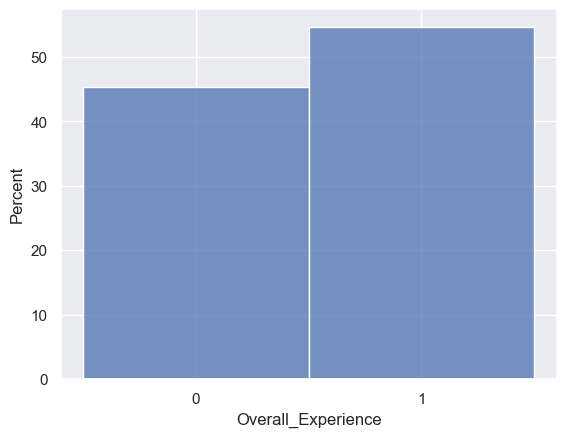

In [191]:
sns.set(style = 'darkgrid')
ax = sns.histplot(data=data_train, x=data_train['Overall_Experience'], discrete = True, stat = 'percent')
ax.set_xticks([0, 1])
ax.set_xticklabels(["0", "1"])
plt.show()

**Observations:**
* The passenger satisfaction is approximately %54.67.

### Univariate analysis of numerical variables

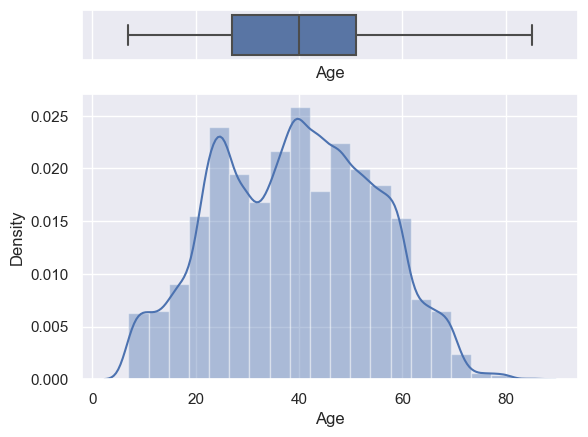

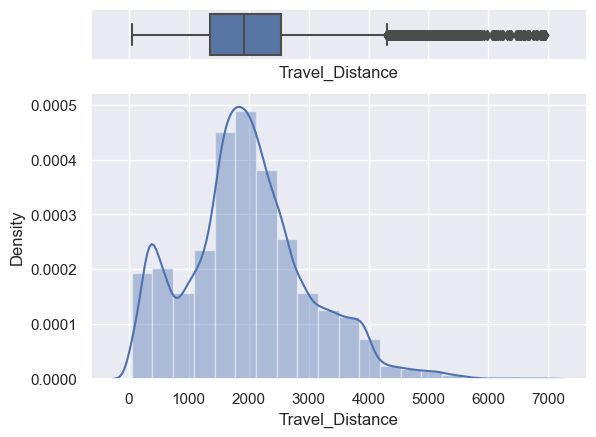

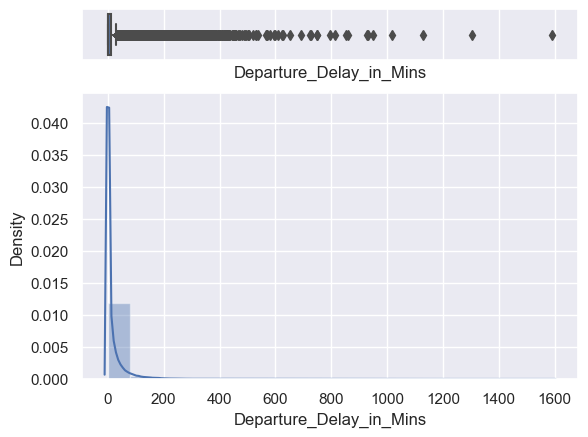

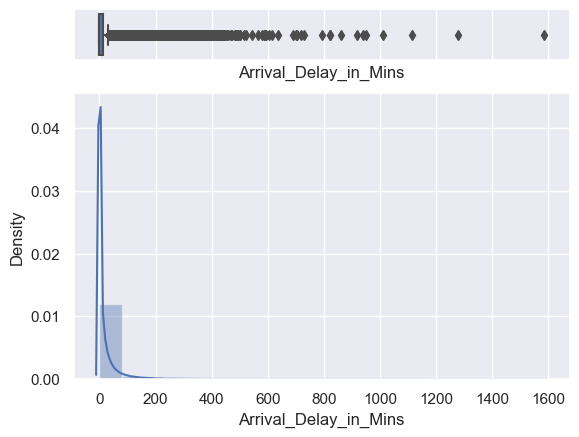

In [192]:
for i in num_att[0:-1]:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x=data_train[i], ax=ax_box)
    sns.distplot(data_train[i], ax=ax_hist, bins=20)
    plt.show()

In [193]:
data_train[num_att[0:-1]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0


**Observations:**
* **Average age is 39 years**. It has a high range, from 7 years to 85 years; this indicates that we have passengers of all ages.
* **75% of travels were at most of 2538 km**. However there outliers in the distance.
* **The median on both delay on departure and arrival is zero**. This means that, usually, the train arrives on time; nonetheless we have a lot of outliers in both these columns. 
* None of the distributions are approximately normal.
* Travel distance, Departure delay and Arrival delay are all right skewed.
* The scales of the numerical values greatly vary and need to be scaled to properly use in predicting models.

### Univariate analysis for categorical variables

In [194]:
for i in object_att:
    print(data_train[i].value_counts(normalize=True))
    print('*'*40)

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64
****************************************
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64
****************************************
Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64
****************************************
Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
****************************************
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
****************************************
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
****************************************
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor        

**Observations:**
* **The gender proportion is approximately the same**; that is, approximately 50% of the passengers are female and 50% are male.
* **82% of the passengers are loyal customers.**
* **69% of passengers travel for business.**
* **Travel class is approximately the same.**
* **Seat class is approximately the same.**

### Bivariate and Multivariate analysis

Let's check how satisfaction is related with categorical variables.

In [258]:
#Ordering categorical variables (ordinal type) to plot
from pandas.api.types import CategoricalDtype
#Making copy of data
data_train_copy = data_train.copy()
#Ordering categorical variables with same possible values
object_att_to_order = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 
                       'Ease_of_Online_Booking', 'Onboard_Service','Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']
cat_values = ['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
cat_type = CategoricalDtype(categories=cat_values, ordered=True)
data_train_copy[object_att_to_order] = data_train_copy[object_att_to_order].astype(cat_type)
#Ordering Platform_location
cat_values = ['Very Inconvenient', 'Inconvenient', 'Needs Improvement', 'Manageable', 'Convenient', 'Very Convenient']
cat_type = CategoricalDtype(categories=cat_values, ordered=True)
data_train_copy['Platform_Location'] = data_train_copy['Platform_Location'].astype(cat_type)
data_train_copy['Overall_Experience'] = data_train_copy['Overall_Experience'].astype('category')

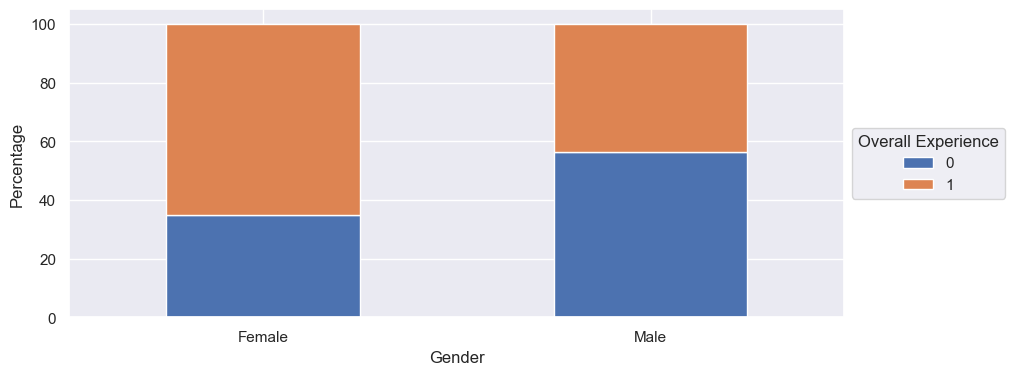

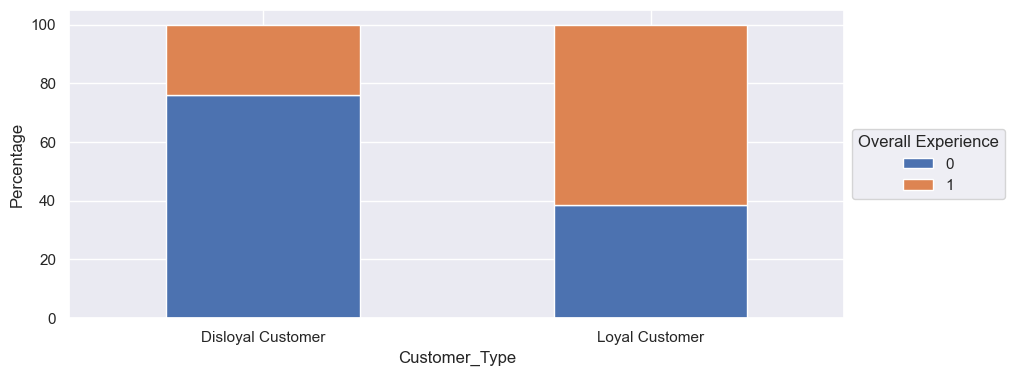

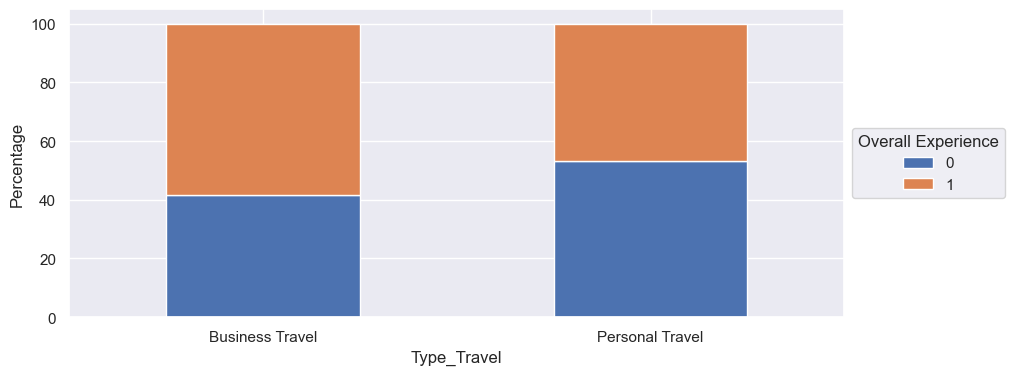

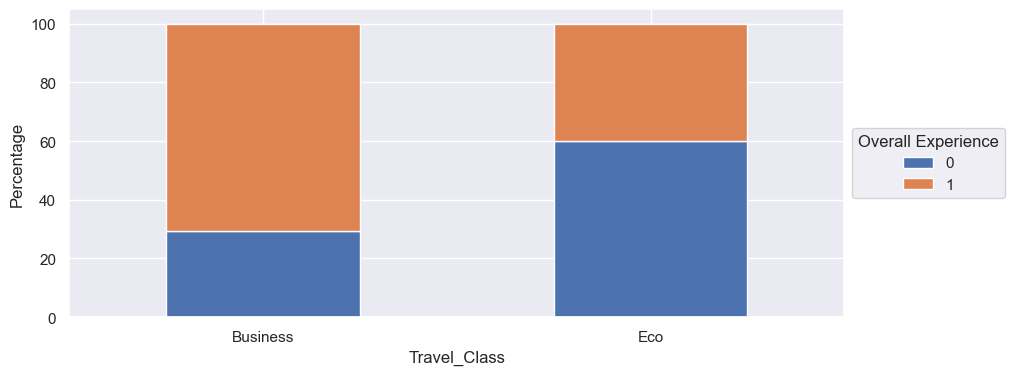

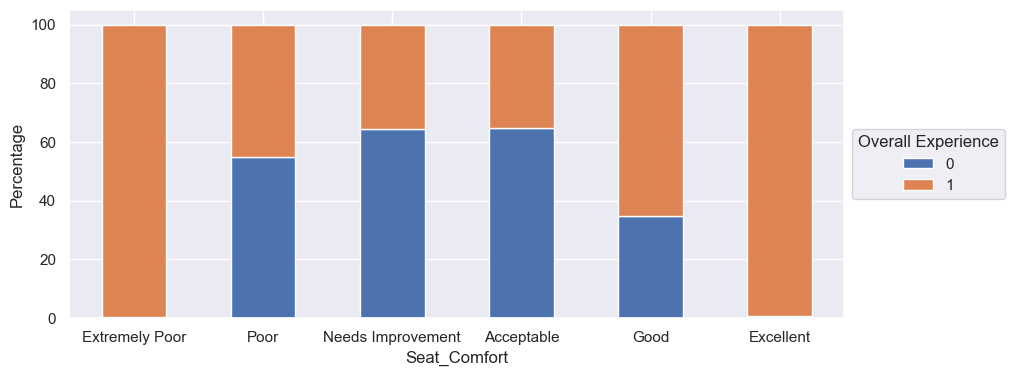

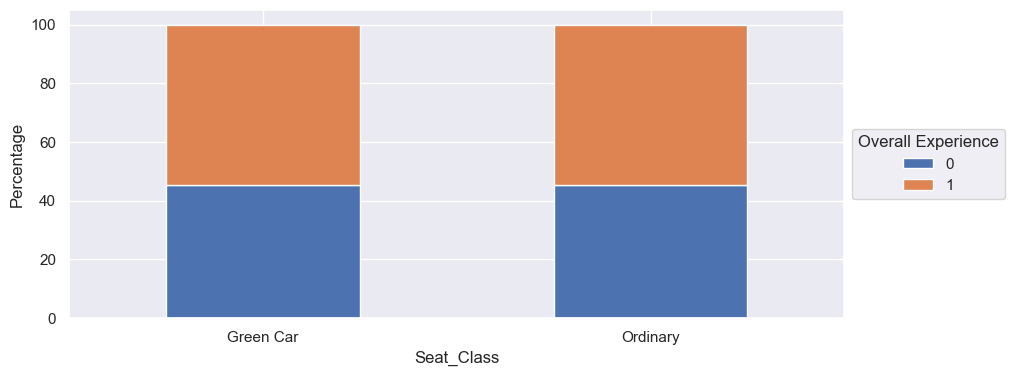

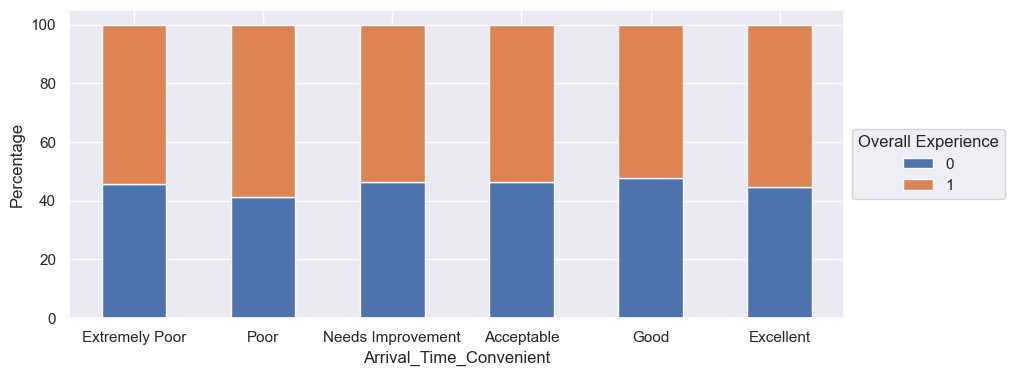

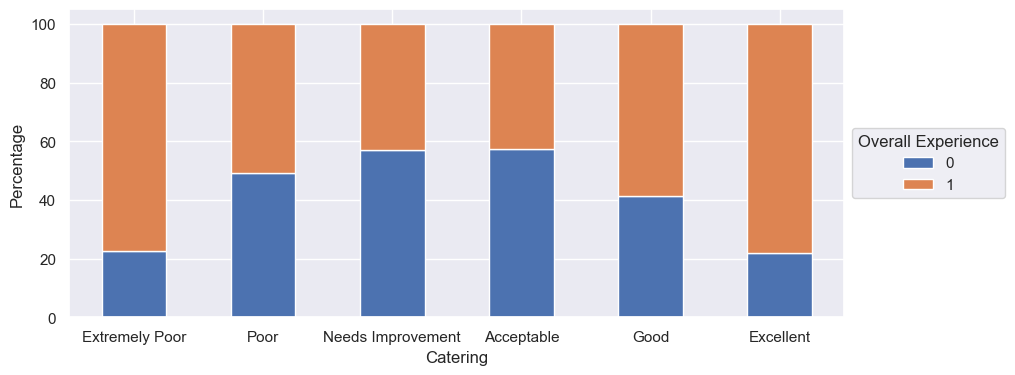

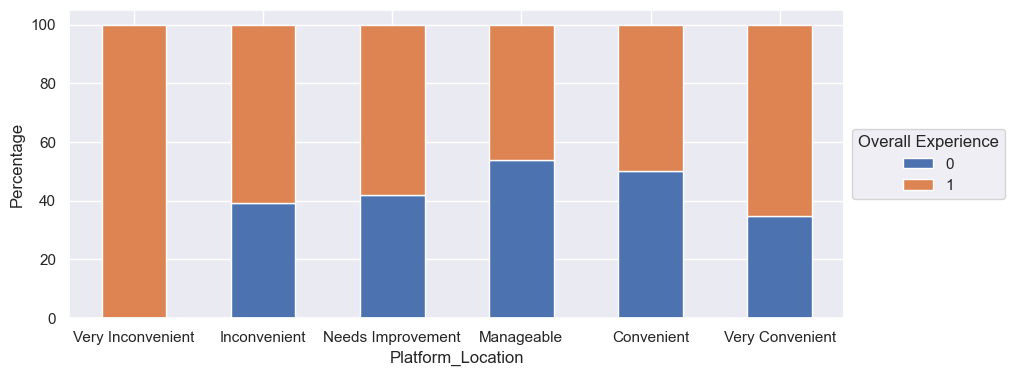

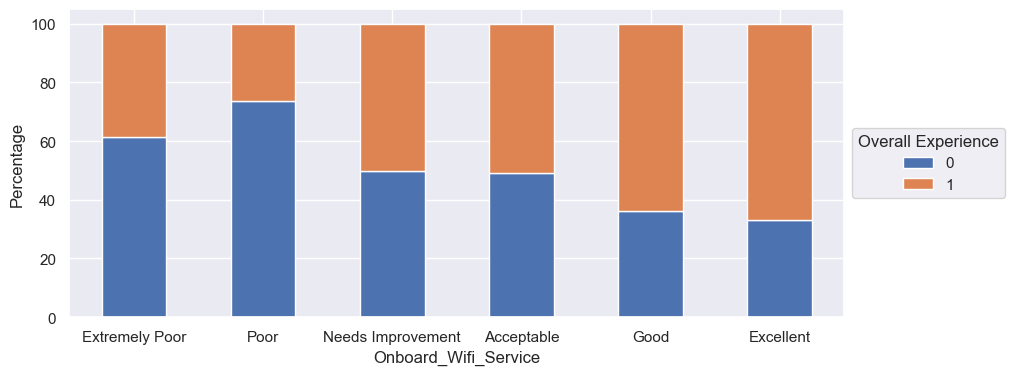

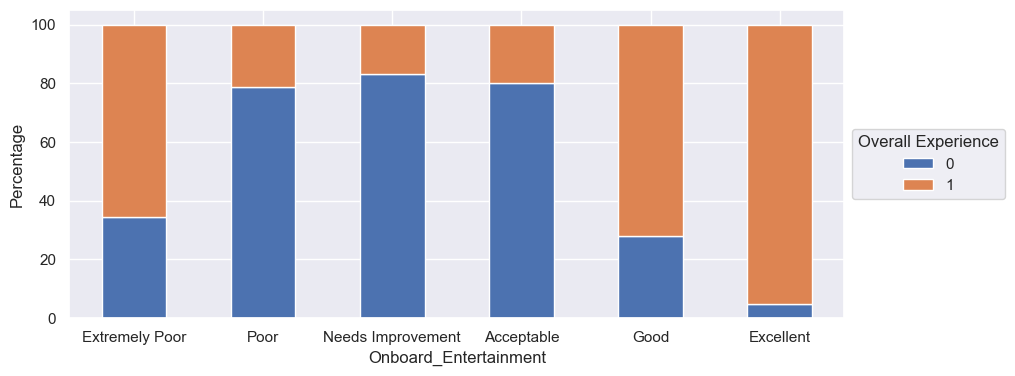

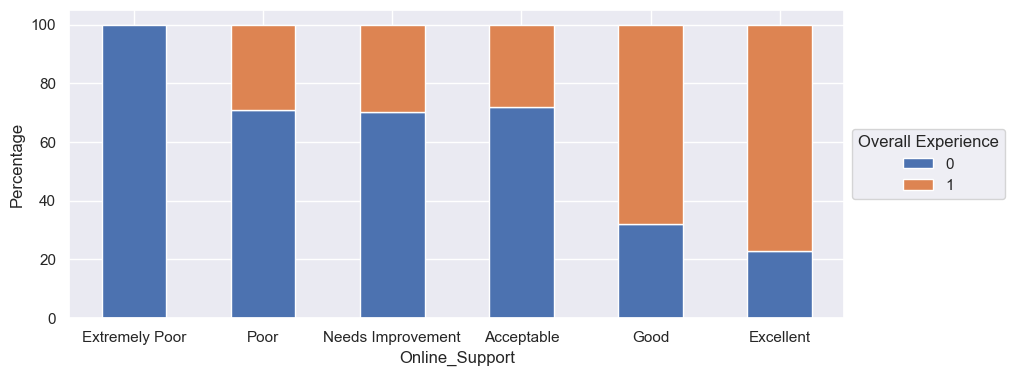

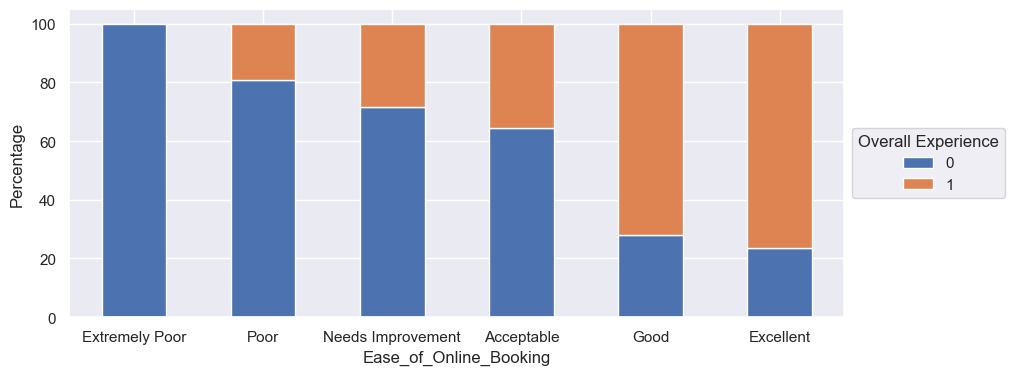

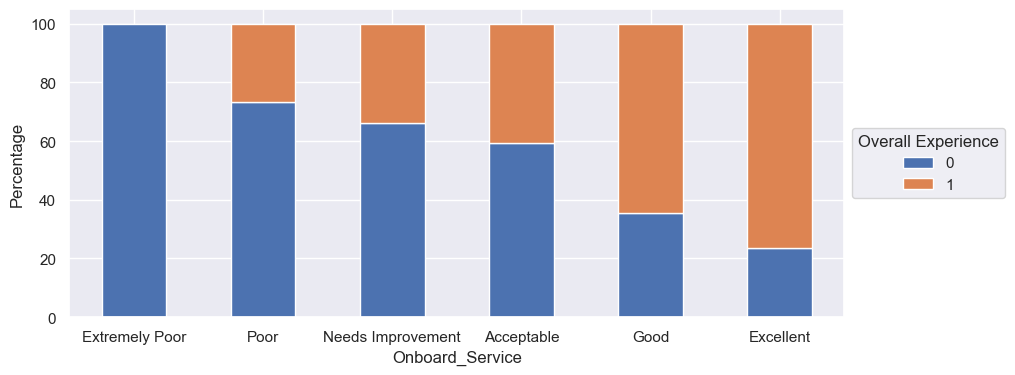

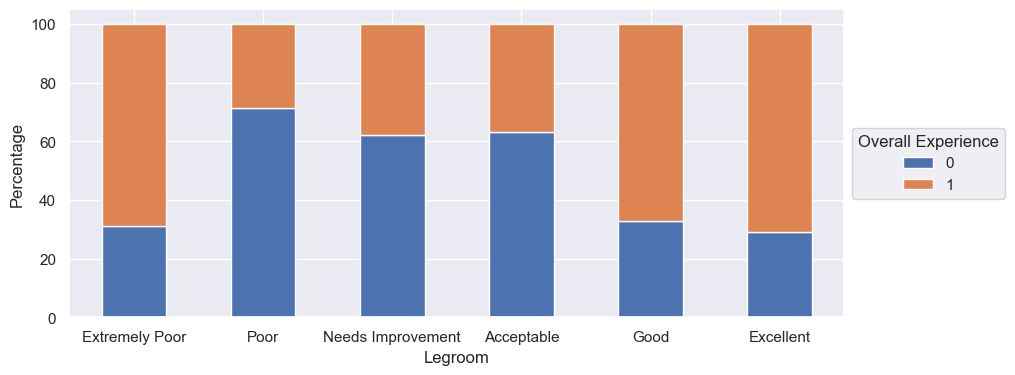

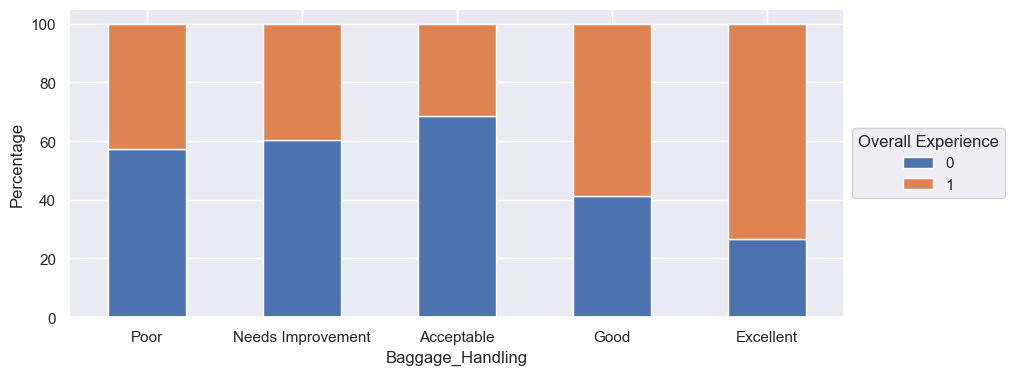

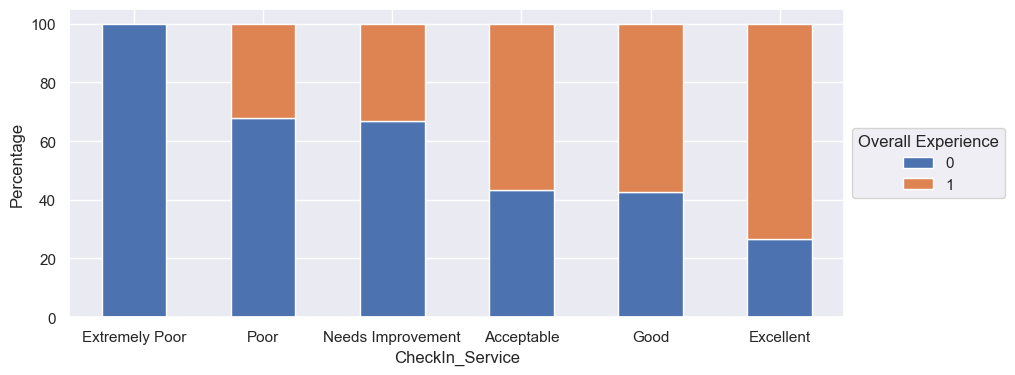

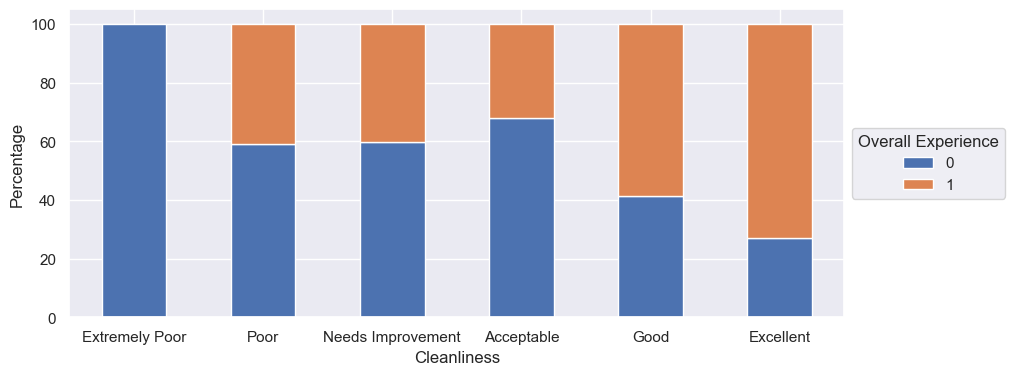

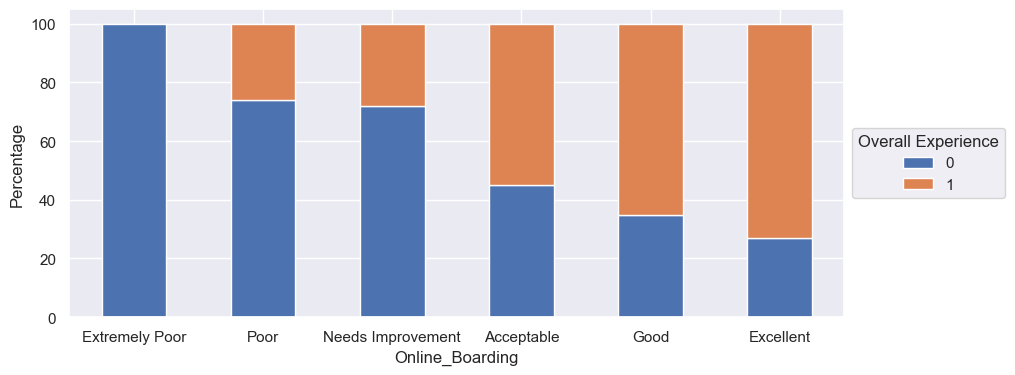

In [259]:
#Relationship between categorical variables and satisfaction
object_att.append('Overall_Experience')
for i in object_att:
    if i != 'Overall_Experience':
        (pd.crosstab(data_train_copy[i],data_train_copy['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(10,4),stacked=True)
        plt.xticks(rotation = 360)
        plt.ylabel('Percentage')
        plt.legend(title = 'Overall Experience', loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

**Observation**:
* **The proportion of female passengers satisfied with the service is greater than the male proportion.**
* **Loyal customers** are more satisfied than disloyal customers.
* Seat Class does not seem to have much weight in the overall experience of the passengers.
* Arrival time convenience does not seem to have much weught in the overall experience of the passengers.
* As the satisfaction increases, the proportion of satisfied overall experience increases for the following variables:
    * Onboard Wifi Service.
    * Online Support.
    * Ease of online booking.
    * Onboard service.
    * Baggage handling.
    * Checkin service.
    * CLeanliness.
    * Online boarding.
    


Let's check the relationship between overall experience and the numerical variables.

In [280]:
#median of numerical variables grouped by overall experience
data_train.groupby('Overall_Experience')[num_att[0:-1]].median()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Overall_Experience,,,,
0,36.0,1953.5,0.0,0.0
1,42.0,1882.0,0.0,0.0


**Observations**
* The median age and median travel distance is not much different between satisfied and non satisfied passengers.
* The median for delays is the same for both satisfied and non satisfied passengers which is consistent with our previous obsevration on arrival time convenience. 

Let's check the relationship between numerical variables.

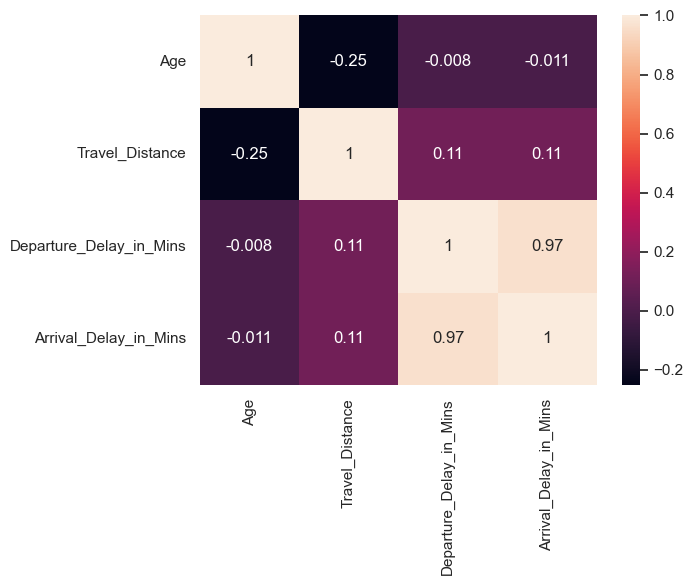

In [282]:
sns.heatmap(data_train[num_att[0:-1]].corr(), annot = True)
plt.show()

**Observations:**
* Delay in departure and arrival are strongly correlated which means we need to drop one of them 